## 第一节：花卉分类
##### 有关乎花种类的分类是一个分类问题(classifiction)其输出的结果是我所期望的各个种类的名称，而不同的花名可以理解为不同的花类(class)
##### 我们这里有的是一个三分类的问题 这种花的种类划分有 setosa versicolor virginica
##### 正对于每一个独立的数据点，我们把它看作为是一个预期，那么它的种类就是它自己本身的标签（lable）。

In [14]:
from sklearn.datasets import load_iris
import numpy as np
iris_datasets = load_iris()
# iris_datasets 这里的iris——datasets是sklearn自己带的一个数据包，里面是用来测试你的代码的准确性的
print("这里的数据包的keys是: \n{}".format(iris_datasets.keys()))

这里的数据包的keys是: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
print(iris_datasets['DESCR'])
# DESCR储存的是我们的数据集的描述信息.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
print(iris_datasets['target_names'])
# target_names里面存放的是待测验的花的名称

['setosa' 'versicolor' 'virginica']


In [17]:
print(iris_datasets['target'])
# 这里target里面存储的是我们测验的结果数据，0，1，2对应的是相应的测试结果，不过这里是未经算法逻辑加持的结果，我们要做的是使用算的得出数据结果然后与原数据结果比对获得结果

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
print(iris_datasets['feature_names'])
# 这里的featurenames里面存放的是有关乎测试数据的一些名称以及单位名称。

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
print(iris_datasets['frame'])

None


### 可视化花卉分布

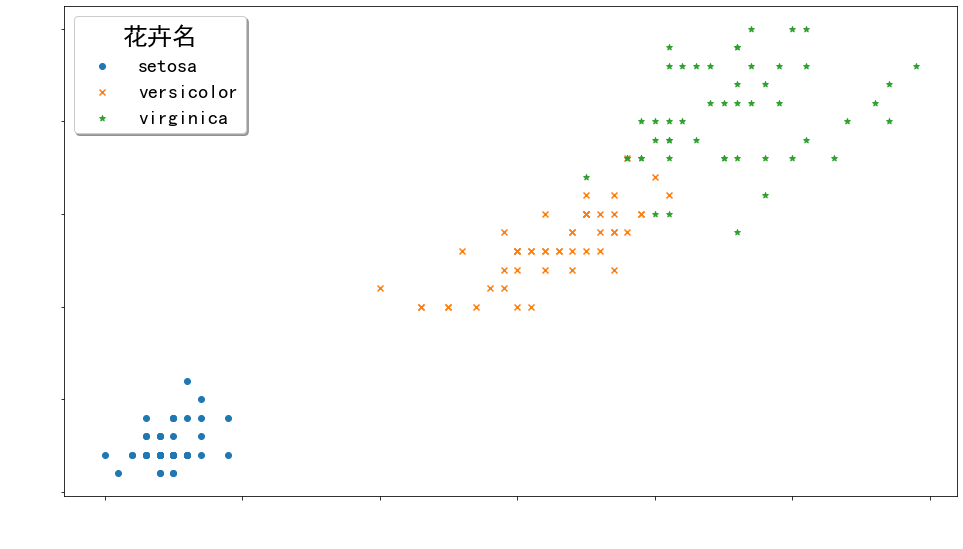

In [20]:
from matplotlib import pyplot as plt
from sklearn import datasets
iris_datasets = datasets.load_iris()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.figure(figsize=(16,9))
data = iris_datasets['data']
class_flower = iris_datasets['target_names']
feature_names = iris_datasets['feature_names']
target = iris_datasets['target']
plt.scatter(data[:,2][target == 0],data[:,3][target == 0],marker='o',label=class_flower[0])
plt.scatter(data[:,2][target == 1],data[:,3][target == 1],marker='x',label=class_flower[1])
plt.scatter(data[:,2][target == 2],data[:,3][target == 2],marker='*',label=class_flower[2])
plt.legend(loc='upper left',shadow=True,title='花卉名',fontsize=20,title_fontsize=25)
plt.ylabel(feature_names[3],fontdict={'size':25},c='white')
plt.xlabel(feature_names[3],fontdict={'size':25},c='white')
plt.yticks(c='white',fontsize=15)
plt.xticks(c='white',fontsize=15)
plt.show()

* sklearn里面内置有很多像花卉一样的数据包，我们可以直接引用使用
    * key

|key|说明|
|:-|:-|
|data|数据的集合，里面存放的每一行都是一组数据，实际上也就是一个n维行向量|
|DESCR|这里面存放的是对这个数据集的描述|
|feature_names|里面存放的是各个参数的名称以及可以使用的单位大小|
|target|待检测的数据的属性值，往往使用数字来贴标签|
|target_names|target对应的名称|
|frame|暂时还处于未知状态|

### 监督学习实现：

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,random_state=0)
# 注意书写的时候不要拆开，数据都是一个训练一个测试。

In [22]:
print("The shape of x_train is :\n\t{}".format(x_train.shape))
print("The shape of x_test is :\n\t{}".format(x_test.shape))

The shape of x_train is :
	(112, 4)
The shape of x_test is :
	(38, 4)


#### 构建第一个模型：K近邻算法：

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

###### 评测系统

In [24]:
x_test_really = np.array([[5,2.9,1,0.2]])
# 注意我们sklearn的predict只能引用二维的no.array数组所以我们需要给与一个一维二维化的操作
prediction = knn.predict(x_test_really)
print("结果是：{}".format(class_flower[prediction]))

结果是：['setosa']


In [25]:
y_predict = np.array(x_test)
y_result = knn.predict(x_test)
print("The result is : \n\t{:.2f}".format(np.mean(y_result == y_test)))
print("{}\n{}".format(x_test.shape,y_test.shape))

The result is : 
	0.97
(38, 4)
(38,)


In [26]:
# 或者我们使用knn的score函数也可以做到上述mean函数以做到
# 注意需要转置。
print("The result is : \n\t{:.2f}".format(knn.score(x_test , y_test.T)))

The result is : 
	0.97


#### 总结
> 这一章我们学习了sklearn最基础的一个数据包文件iris(花卉数据)可以说简单过关
> 有关包文件导入，我们导入了load_iris，KNiberClassife，等等
> 导入过后使用是iris的各种keys实际上又是多个数据集，且是以numpy.array作为数据类型来填入
> 在使用K近邻模块我们基本算出来这个的结果，使用mean函数，与score函数我们可以得出结果，但是值得注意的是我们需要把这些矩阵的Demension设置相同。
> 有关于matplotlib中的pyplot函数部分，我们继续学习了matplot 的 一些详细的细节，这些函数的一些参数的使用，绘制图例，绘制线的形状，线的style，等等一些操作。且都以及写进了笔记本里面。